In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import math
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed=0
np.random.seed(seed)
tf.set_random_seed(seed)

df=pd.read_csv("Desktop/framingham_.csv")
print(df.shape)

Instructions for updating:
non-resource variables are not supported in the long term
(4299, 16)


## 1. 중복된 데이터 삭제

## 2. data 행갯수 확인 
####  ( 4299(기존) - 4241(중복제거 후) = 58개의 중복 데이터 삭제

## 3. NaN 값을 갯수 확인

## 4. NaN 값에 0을 넣어준다.

In [3]:
# 1. 중복데이터 삭제하기
data = df.drop_duplicates(subset=None, keep='first', inplace=False)
print(data.shape)
print()

# 2. 존재하는 행 갯수와 타입을 확인한다.
print(data.info())
print()

# 3. NaN값이 몇개가 있는지 확인한다.
print(data.isnull().sum())
print()

# 4. NaN값 제거하기  -> 0으로 채우기
data=data.replace(to_replace=np.NaN,value=0)

(4241, 16)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4241 entries, 0 to 4243
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4241 non-null   int64  
 1   age              4241 non-null   int64  
 2   education        4136 non-null   float64
 3   currentSmoker    4241 non-null   int64  
 4   cigsPerDay       4212 non-null   float64
 5   BPMeds           4188 non-null   float64
 6   prevalentStroke  4241 non-null   int64  
 7   prevalentHyp     4241 non-null   int64  
 8   diabetes         4241 non-null   int64  
 9   totChol          4191 non-null   float64
 10  sysBP            4241 non-null   float64
 11  diaBP            4241 non-null   float64
 12  BMI              4222 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          3853 non-null   float64
 15  TenYearCHD       4241 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 563.3 KB
N

In [4]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [5]:
print(data.isnull().sum())
print(data.shape)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
(4241, 16)


In [6]:
'''
4. NaN값 제거하는 경우
data=data.dropna()
print(data.isnull().sum())
'''

'\n4. NaN값 제거하는 경우\ndata=data.dropna()\nprint(data.isnull().sum())\n'

In [7]:
x = data.iloc[:4241,0:15]
y = data.iloc[:4241,15]

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=seed)
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
4236    0
4237    0
4238    0
4239    0
4243    0
Name: TenYearCHD, Length: 4241, dtype: int64


In [9]:
model=Sequential()   # 딥러닝 구조를 짜고 층을 설정하는 부분.

model.add(Dense(35,input_dim=15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

res1 = model.fit(train_x,train_y,epochs=100,batch_size=4)

print("Accuracy : %.4f"%(model.evaluate(test_x,test_y)[1]))

Train on 2968 samples
Epoch 1/100
2968/2968 [==============================] - 1s 331us/sample - loss: 1.1508 - acc: 0.7951
Epoch 2/100
2968/2968 [==============================] - 1s 446us/sample - loss: 0.5899 - acc: 0.8090
Epoch 3/100
2968/2968 [==============================] - 2s 563us/sample - loss: 0.5690 - acc: 0.8127
Epoch 4/100
2968/2968 [==============================] - 2s 559us/sample - loss: 0.5594 - acc: 0.8174
Epoch 5/100
2968/2968 [==============================] - 1s 474us/sample - loss: 0.5063 - acc: 0.8285
Epoch 6/100
2968/2968 [==============================] - 1s 475us/sample - loss: 0.5306 - acc: 0.8214
Epoch 7/100
2968/2968 [==============================] - 1s 357us/sample - loss: 0.5031 - acc: 0.8299
Epoch 8/100
2968/2968 [==============================] - 1s 380us/sample - loss: 0.4933 - acc: 0.8275
Epoch 9/100
2968/2968 [==============================] - 1s 441us/sample - loss: 0.4853 - acc: 0.8261
Epoch 10/100
2968/2968 [==============================] - 1s

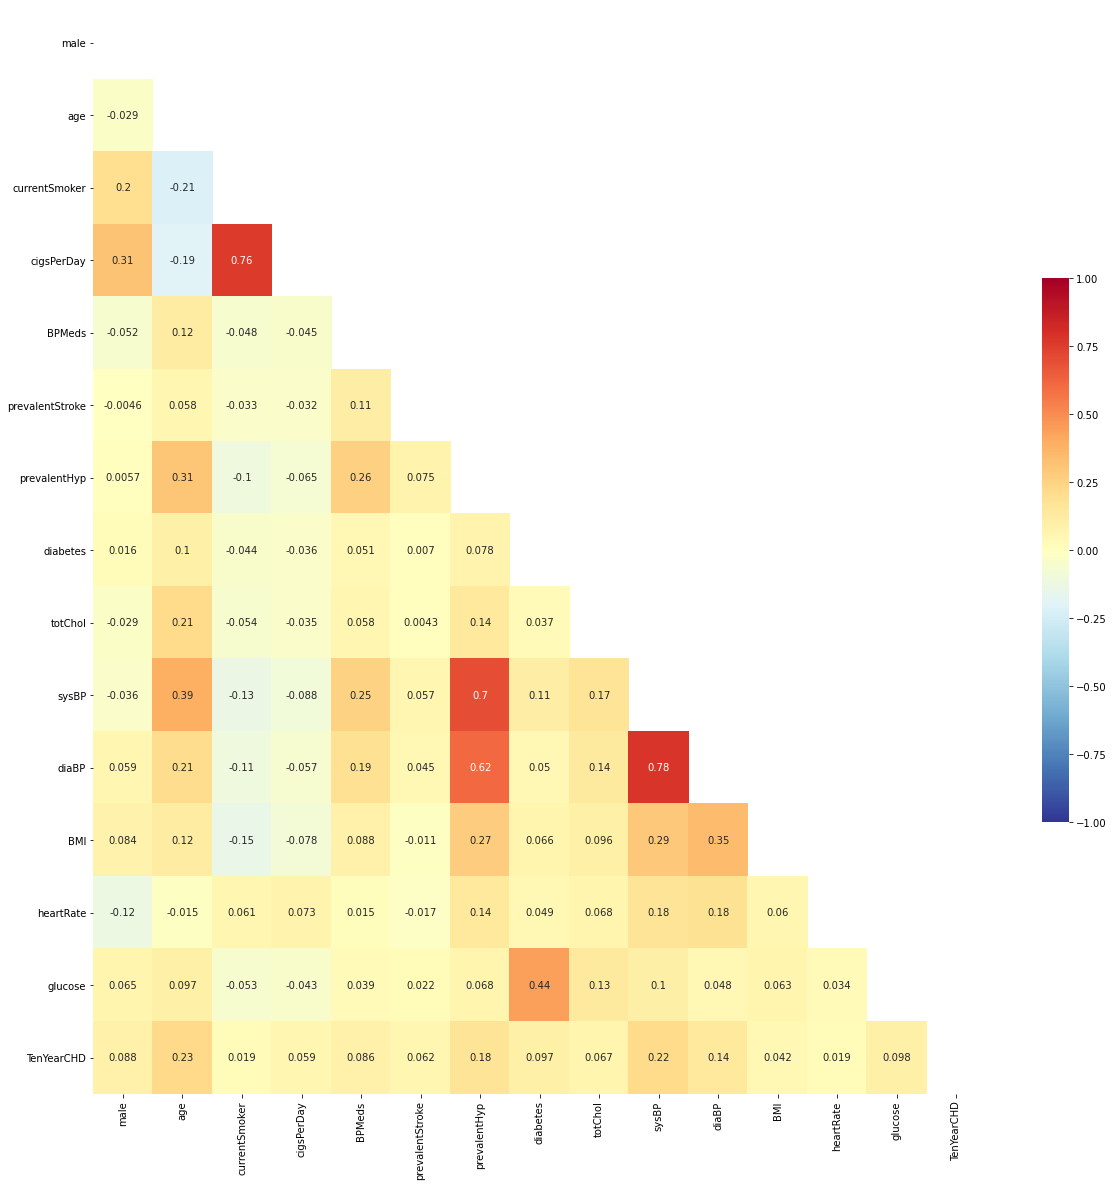

male               0.088243
age                0.225449
currentSmoker      0.019345
cigsPerDay         0.058776
BPMeds             0.086463
prevalentStroke    0.061829
prevalentHyp       0.177511
diabetes           0.097358
totChol            0.066634
sysBP              0.216309
diaBP              0.144793
BMI                0.041579
heartRate          0.019426
glucose            0.098292
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


In [19]:
#상관관계 -1부터 1까지 
corrs = data.corr(method='pearson')
plt.figure(figsize=(20, 20))

mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrs, annot=True, cmap="RdYlBu_r",cbar_kws={"shrink": .5}, mask=mask, vmin = -1,vmax = 1 )
plt.show()
print(corrs['TenYearCHD']) 

In [11]:
data=data.drop(['education'],axis=1,inplace=False)

In [12]:
data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [13]:
x_ = data.iloc[:4241,0:14]
y_ = data.iloc[:4241,14]

train_x1,test_x1,train_y1,test_y1 = train_test_split(x_,y_,test_size=0.3,random_state=seed)

In [28]:
edit_model=Sequential()   # 딥러닝 구조를 짜고 층을 설정하는 부분.

edit_model.add(Dense(35,input_dim=14,activation='relu'))
edit_model.add(Dense(14,activation='relu'))
edit_model.add(Dense(1,activation='sigmoid'))

edit_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

res2 = edit_model.fit(train_x1,train_y1,epochs=100,batch_size=4)

print("Accuracy : %.4f"%(edit_model.evaluate(test_x1,test_y1)[1]))

Train on 2968 samples
Epoch 1/100
2968/2968 [==============================] - 1s 456us/sample - loss: 0.8064 - acc: 0.8036
Epoch 2/100
2968/2968 [==============================] - 2s 542us/sample - loss: 0.4943 - acc: 0.8349
Epoch 3/100
2968/2968 [==============================] - 1s 493us/sample - loss: 0.4742 - acc: 0.8339
Epoch 4/100
2968/2968 [==============================] - 2s 643us/sample - loss: 0.4633 - acc: 0.8403
Epoch 5/100
2968/2968 [==============================] - 2s 649us/sample - loss: 0.4503 - acc: 0.8403
Epoch 6/100
2968/2968 [==============================] - 2s 653us/sample - loss: 0.4507 - acc: 0.8396
Epoch 7/100
2968/2968 [==============================] - 2s 553us/sample - loss: 0.4370 - acc: 0.8443
Epoch 8/100
2968/2968 [==============================] - 2s 635us/sample - loss: 0.4368 - acc: 0.8450
Epoch 9/100
2968/2968 [==============================] - 2s 661us/sample - loss: 0.4247 - acc: 0.8487
Epoch 10/100
2968/2968 [==============================] - 2s

In [29]:
pred_all = edit_model.predict(test_x1)

a=0
for i in pred_all:
    a=a+1
    print("%d번째 사람의 심장병 걸릴 확률은 %.2f%% 입니다."%(a,i*100))
    

1번째 사람의 심장병 걸릴 확률은 12.37% 입니다.
2번째 사람의 심장병 걸릴 확률은 4.74% 입니다.
3번째 사람의 심장병 걸릴 확률은 4.22% 입니다.
4번째 사람의 심장병 걸릴 확률은 8.48% 입니다.
5번째 사람의 심장병 걸릴 확률은 7.73% 입니다.
6번째 사람의 심장병 걸릴 확률은 4.37% 입니다.
7번째 사람의 심장병 걸릴 확률은 12.85% 입니다.
8번째 사람의 심장병 걸릴 확률은 16.43% 입니다.
9번째 사람의 심장병 걸릴 확률은 4.38% 입니다.
10번째 사람의 심장병 걸릴 확률은 18.20% 입니다.
11번째 사람의 심장병 걸릴 확률은 17.69% 입니다.
12번째 사람의 심장병 걸릴 확률은 5.22% 입니다.
13번째 사람의 심장병 걸릴 확률은 10.29% 입니다.
14번째 사람의 심장병 걸릴 확률은 2.42% 입니다.
15번째 사람의 심장병 걸릴 확률은 9.18% 입니다.
16번째 사람의 심장병 걸릴 확률은 14.35% 입니다.
17번째 사람의 심장병 걸릴 확률은 1.37% 입니다.
18번째 사람의 심장병 걸릴 확률은 29.18% 입니다.
19번째 사람의 심장병 걸릴 확률은 16.98% 입니다.
20번째 사람의 심장병 걸릴 확률은 20.76% 입니다.
21번째 사람의 심장병 걸릴 확률은 13.86% 입니다.
22번째 사람의 심장병 걸릴 확률은 11.36% 입니다.
23번째 사람의 심장병 걸릴 확률은 10.36% 입니다.
24번째 사람의 심장병 걸릴 확률은 16.98% 입니다.
25번째 사람의 심장병 걸릴 확률은 15.24% 입니다.
26번째 사람의 심장병 걸릴 확률은 13.07% 입니다.
27번째 사람의 심장병 걸릴 확률은 9.69% 입니다.
28번째 사람의 심장병 걸릴 확률은 11.02% 입니다.
29번째 사람의 심장병 걸릴 확률은 15.45% 입니다.
30번째 사람의 심장병 걸릴 확률은 15.95% 입니다.
31번째 사람의 심장병 걸릴 확률은 12.08% 입니다.
32번째 사람의 심장병 걸릴 확률은 5.27% 입니

888번째 사람의 심장병 걸릴 확률은 10.54% 입니다.
889번째 사람의 심장병 걸릴 확률은 37.13% 입니다.
890번째 사람의 심장병 걸릴 확률은 11.96% 입니다.
891번째 사람의 심장병 걸릴 확률은 34.41% 입니다.
892번째 사람의 심장병 걸릴 확률은 9.05% 입니다.
893번째 사람의 심장병 걸릴 확률은 4.91% 입니다.
894번째 사람의 심장병 걸릴 확률은 10.98% 입니다.
895번째 사람의 심장병 걸릴 확률은 2.76% 입니다.
896번째 사람의 심장병 걸릴 확률은 18.18% 입니다.
897번째 사람의 심장병 걸릴 확률은 11.36% 입니다.
898번째 사람의 심장병 걸릴 확률은 2.04% 입니다.
899번째 사람의 심장병 걸릴 확률은 16.98% 입니다.
900번째 사람의 심장병 걸릴 확률은 29.99% 입니다.
901번째 사람의 심장병 걸릴 확률은 3.33% 입니다.
902번째 사람의 심장병 걸릴 확률은 1.58% 입니다.
903번째 사람의 심장병 걸릴 확률은 3.18% 입니다.
904번째 사람의 심장병 걸릴 확률은 13.15% 입니다.
905번째 사람의 심장병 걸릴 확률은 6.56% 입니다.
906번째 사람의 심장병 걸릴 확률은 1.08% 입니다.
907번째 사람의 심장병 걸릴 확률은 4.12% 입니다.
908번째 사람의 심장병 걸릴 확률은 8.83% 입니다.
909번째 사람의 심장병 걸릴 확률은 2.87% 입니다.
910번째 사람의 심장병 걸릴 확률은 0.90% 입니다.
911번째 사람의 심장병 걸릴 확률은 7.69% 입니다.
912번째 사람의 심장병 걸릴 확률은 11.22% 입니다.
913번째 사람의 심장병 걸릴 확률은 12.36% 입니다.
914번째 사람의 심장병 걸릴 확률은 15.98% 입니다.
915번째 사람의 심장병 걸릴 확률은 11.25% 입니다.
916번째 사람의 심장병 걸릴 확률은 10.14% 입니다.
917번째 사람의 심장병 걸릴 확률은 9.27% 입니다.
918번째 사람의 심장병 걸릴 확률은 5.89

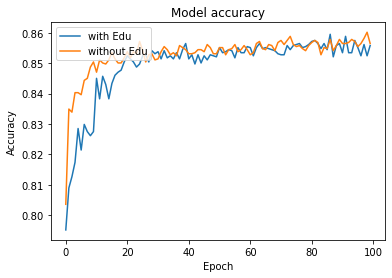

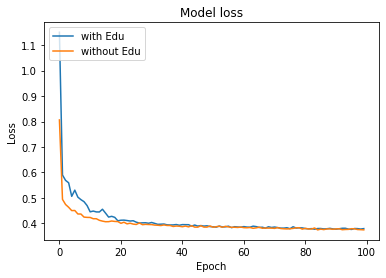

In [30]:
# Education 빼기 전과 후의 학습 정확성 값을 플롯팅
plt.plot(res1.history['acc'])
plt.plot(res2.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with Edu','without Edu'], loc='upper left')
plt.show()

# Education 빼기 전과 후의 학습 손실 값을 플롯팅
plt.plot(res1.history['loss'])
plt.plot(res2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with Edu','without Edu'], loc='upper left')
plt.show()

In [31]:
import sklearn as skl
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from tempfile import mkdtemp
from shutil import rmtree

def plot_roc(y_test, y_pred):
       fpr, tpr, thresholds = skl.metrics.roc_curve(y_test, y_pred, pos_label=1)
       roc_auc = skl.metrics.auc(fpr, tpr)
       plt.figure()
        
       lw = 2
       plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area ={0:.2f})'.format(roc_auc))
       plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    
       plt.xlim([0.0, 1.0])
       plt.ylim([0.0, 1.05])
    
       plt.xlabel('False Positive Rate')
       plt.ylabel('True Positive Rate')
    
       plt.title('Receiver operating characteristic example')
       plt.legend(loc="lower right")
       plt.show()
 

Loss :  0.4008697060179918
Accuracy :  0.85380805
Confusion Matrix : 
 [[3577   20]
 [ 600   44]]


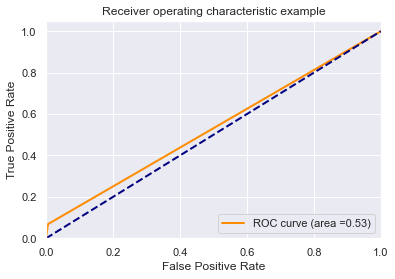

In [42]:
y_hat= edit_model.predict(x_)
y_hat=(y_hat>0.6)
cm = confusion_matrix(y_, y_hat)
loss, accuracy = edit_model.evaluate(x_,y_)
print('Loss : ', loss)
print('Accuracy : ', accuracy)
print('Confusion Matrix : \n', cm)

plot_roc(y_,y_hat)

Text(0.5, 1.0, 'Age wise data distribution with Disease estimates')

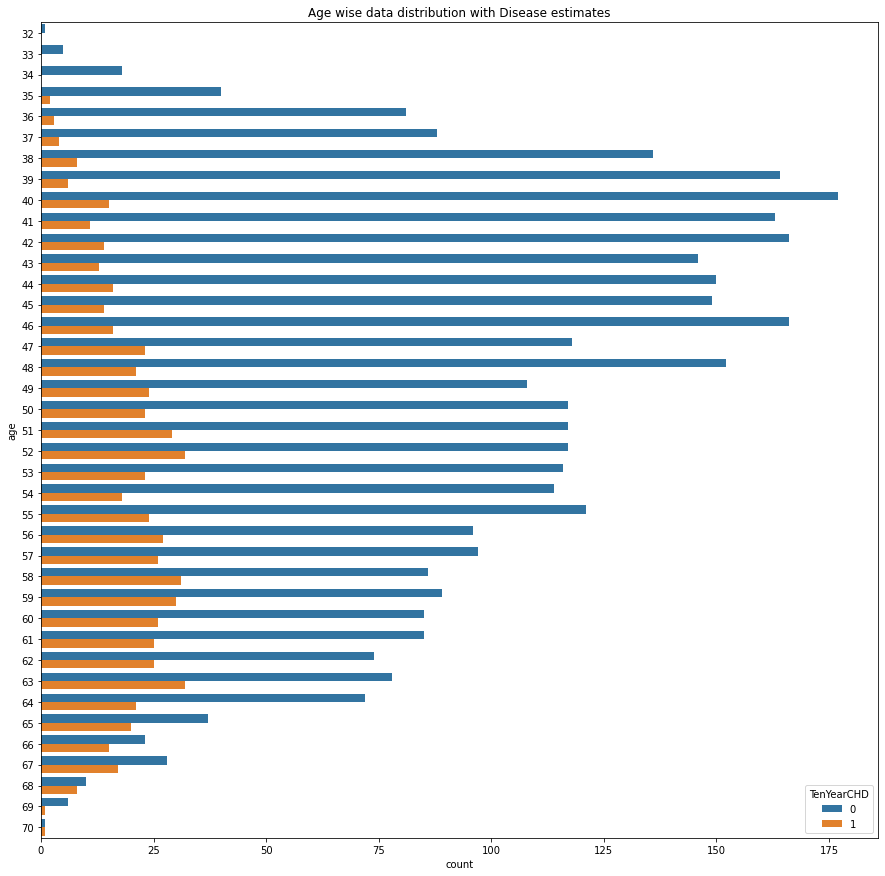

In [33]:
plt.figure(figsize=(15,15))
sns.countplot(y=data['age'], hue=data['TenYearCHD'])
plt.title('Age wise data distribution with Disease estimates') # 연령별 확진자 분포

Text(0.5, 1.0, 'Gender wise data distribution')

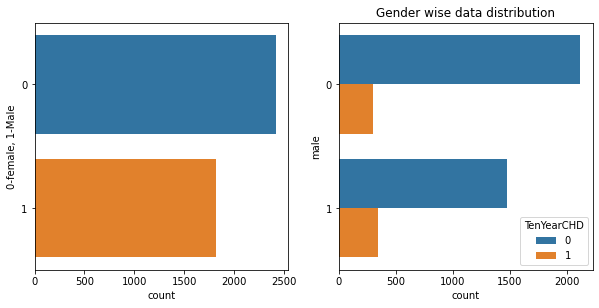

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(y=data['male'])
plt.ylabel('0-female, 1-Male')

plt.subplot(2,2,2)
sns.countplot(y=data['male'], hue=data['TenYearCHD'])
plt.title('Gender wise data distribution') # 성별 비율과 확진자 분포

Text(0.5, 1.0, 'Smoker Distribution')

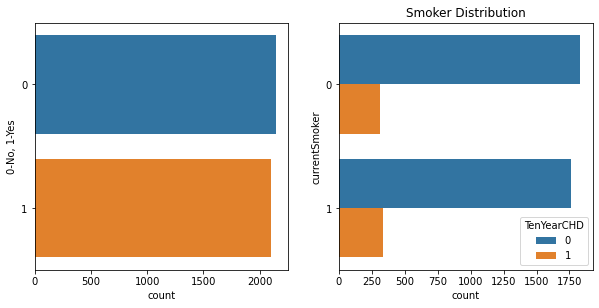

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(y=data['currentSmoker'])
plt.ylabel('0-No, 1-Yes')

plt.subplot(2,2,2)
sns.countplot(y=data['currentSmoker'], hue=data['TenYearCHD'])
plt.title('Smoker Distribution') #흡연자 비율과 확진자 분포


Text(0.5, 1.0, 'Who used Blood Pressure Medicine')

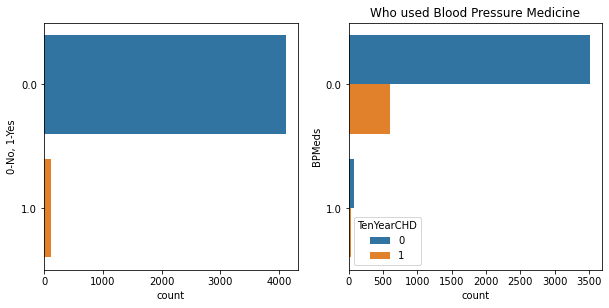

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(y=data['BPMeds'])
plt.ylabel('0-No, 1-Yes')

plt.subplot(2,2,2)
sns.countplot(y=data['BPMeds'], hue=data['TenYearCHD'])
plt.title('Who used Blood Pressure Medicine') #혈압약 복용자 비율과 확진자 분포

Text(0.5, 1.0, 'Who had the stroke')

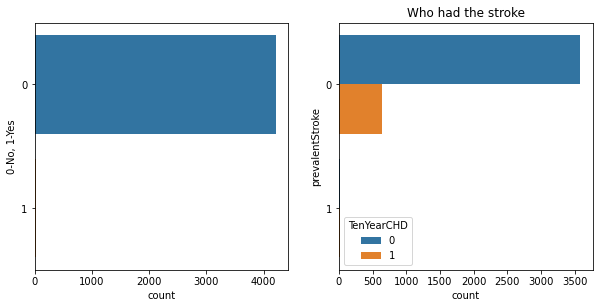

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(y=data['prevalentStroke'])
plt.ylabel('0-No, 1-Yes')

plt.subplot(2,2,2)
sns.countplot(y=data['prevalentStroke'], hue=data['TenYearCHD'])
plt.title('Who had the stroke') # 뇌졸증 환자와 확진자 분포

Text(0.5, 1.0, 'Who had the Hypertensive')

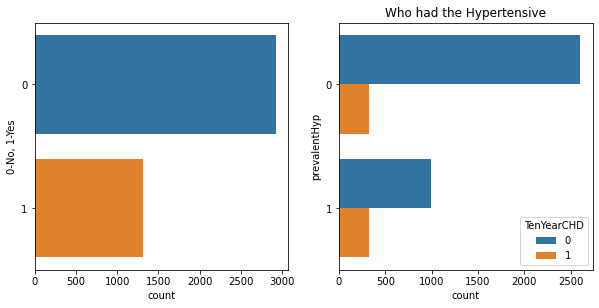

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(y=data['prevalentHyp'])
plt.ylabel('0-No, 1-Yes')

plt.subplot(2,2,2)
sns.countplot(y=data['prevalentHyp'], hue=data['TenYearCHD'])
plt.title('Who had the Hypertensive') #고혈압 환자와 확진자 분포

Text(0.5, 1.0, 'Who had the Diabetes')

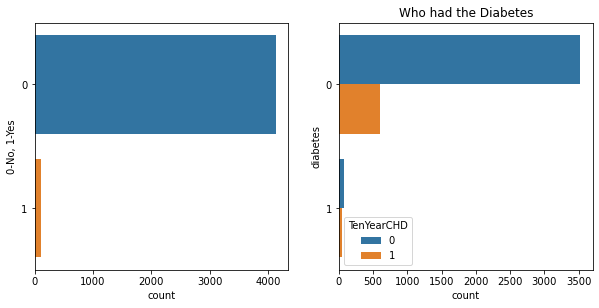

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(y=data['diabetes'])
plt.ylabel('0-No, 1-Yes')

plt.subplot(2,2,2)
sns.countplot(y=data['diabetes'], hue=data['TenYearCHD'])
plt.title('Who had the Diabetes') #당뇨병 환자와 확진자 분포

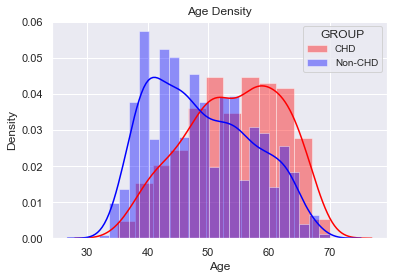

In [44]:
chd_data = data[data['TenYearCHD']==1]
unchd_data = data[data['TenYearCHD']==0]

#age 대신에 다른 feature 값을 넣으면 해당 feature의 Density 볼 수 있음
sns.distplot(chd_data['age'], hist=True, kde=True,color='red',label='CHD')
sns.distplot(unchd_data['age'], hist=True, kde=True,color='blue',label='Non-CHD')

plt.title('Age Density')
plt.xlabel('Age')
plt.ylabel('Density')

plt.legend(prop={'size': 10}, title = 'GROUP')
plt.show()

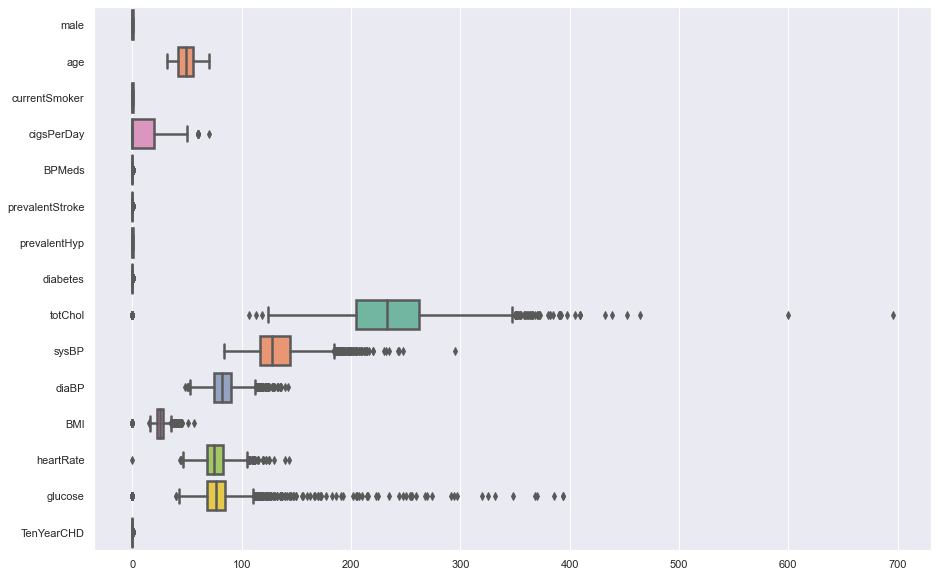

In [45]:
# 데이터 상자그림
plt.figure(figsize=(15,10))
sns.set(color_codes=True)
sns.boxplot(data=data, orient='h', palette = 'Set2',linewidth=2.5) 